### Florence Fong
## CSC 217 - Spring 2019  - Final Project:
## Relationship Between Country's Economic Status and CO2 Emissions 

Fossil fuel consumption is the main source of CO2 emissions worldwide. Here in the US, we use it to generate electricity for homes and industries, and to power vehicles of all sizes. As one of the world's leading countries in economic power, we also contribute to the second most carbon emissions internationally. This leads to the question: do countries with higher economic status need to consume more fossil fuel and thus have higher CO2 emissions? Are there any developed and developing countries that show otherwise, and if so, why?

The United Nations differentiates developed from developing based on many factors such as GDP, industrialization, standard of living, birth and death rates, etc. By using subsets, I can observe how correlation strength can differ by countries' development status. This can further my conclusion on whether a higher economic status must equate to higher CO2 emissions and vice versa.

To represent economic status quantitatively, I will be using the country's GDP per capita. This data has been taken from the International Monetary Fund site and reformatted onto my own CSV files. The values of CO2 Emissions per capita are acquired from Wikipedia. I will be using data from 2014 for both the GDP per capita and amount of CO2 emissions per capita. I chose to use the amount per capita to have a better idea of what the average individual’s living condition may be like in the country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
dfDeveloped = pd.read_csv('Developed Countries.csv')
dfDeveloping = pd.read_csv('Developing Countries.csv')

## Exploratory Analysis

### Developed Countries

We will first evaluate the set of developed countries.

Text(0.5, 0.92, 'GDP per capita of Developed Countries')

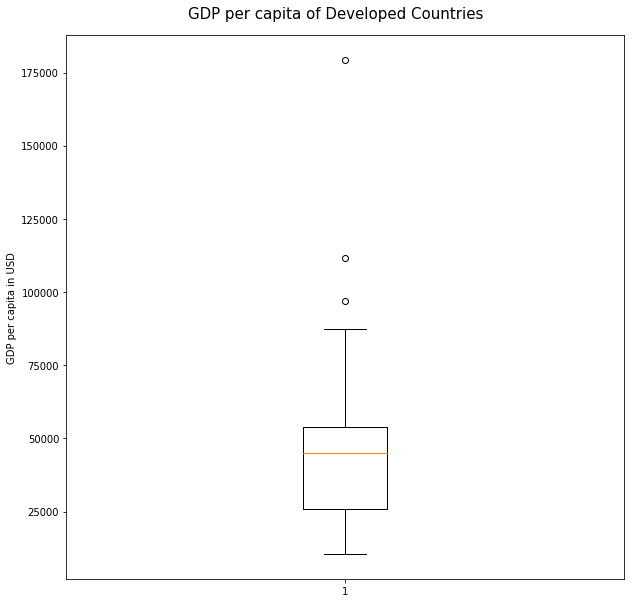

In [3]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(dfDeveloped['GDP per capita'])
plt.ylabel('GDP per capita in USD')
fig.suptitle('GDP per capita of Developed Countries', fontsize=15, y=0.92)

Text(0.5, 0.92, 'CO2 Emissions per capita in tons of Developed Countries')

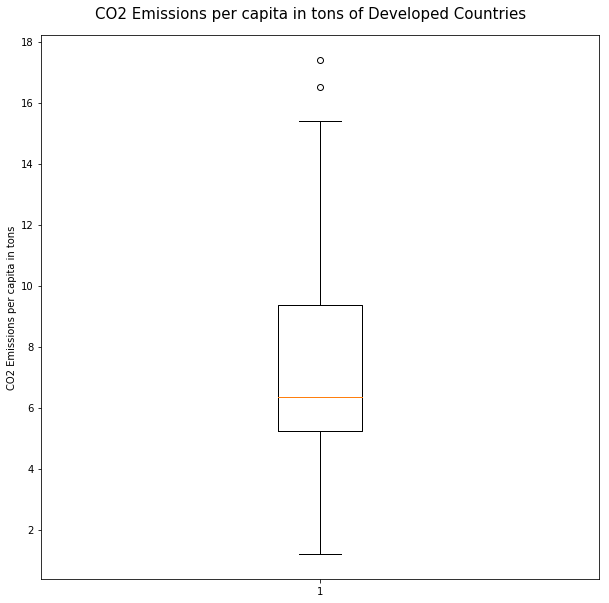

In [4]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(dfDeveloped['CO2 Emissions per capita'])
plt.ylabel('CO2 Emissions per capita in tons')
fig.suptitle('CO2 Emissions per capita in tons of Developed Countries', fontsize=15, y=0.92)

In [5]:
#Mean
dfDeveloped.mean()

GDP per capita              47574.305556
CO2 Emissions per capita        7.783333
dtype: float64

In [6]:
#Median
dfDeveloped.median()

GDP per capita              45095.50
CO2 Emissions per capita        6.35
dtype: float64

In [7]:
#Minimum GDP
dfDeveloped[dfDeveloped['GDP per capita'] == np.min(dfDeveloped['GDP per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
33,Turkey,10482,4.5


In [8]:
#Maximum GDP
dfDeveloped[dfDeveloped['GDP per capita'] == np.max(dfDeveloped['GDP per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
18,Liechtenstein,179308,1.2


In [9]:
#Minimum CO2 Emissions
dfDeveloped[dfDeveloped['CO2 Emissions per capita'] == np.min(dfDeveloped['CO2 Emissions per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
18,Liechtenstein,179308,1.2


In [10]:
#Maximum CO2 Emissions
dfDeveloped[dfDeveloped['CO2 Emissions per capita'] == np.max(dfDeveloped['CO2 Emissions per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
20,Luxembourg,111716,17.4


In [11]:
#Variance
dfDeveloped.var()

GDP per capita              1.004034e+09
CO2 Emissions per capita    1.541229e+01
dtype: float64

In [12]:
#Range
dfDeveloped[['GDP per capita', 'CO2 Emissions per capita']].max() - dfDeveloped[['GDP per capita', 'CO2 Emissions per capita']].min()

GDP per capita              168826.0
CO2 Emissions per capita        16.2
dtype: float64

In [13]:
#Interquartile Range
dfDeveloped.quantile(q=0.75) - dfDeveloped.quantile(q=0.25)

GDP per capita              27940.500
CO2 Emissions per capita        4.125
dtype: float64

In [14]:
#Higher Outlier GDP
np.percentile(dfDeveloped['GDP per capita'], q=75) + (np.percentile(dfDeveloped['GDP per capita'], q=75) - np.percentile(dfDeveloped['GDP per capita'], q=25)) * 1.5

95656.5

In [15]:
dfDeveloped[dfDeveloped['GDP per capita'] >= 95656.5]

,Country,GDP per capita,CO2 Emissions per capita
18,Liechtenstein,179308,1.2
20,Luxembourg,111716,17.4
24,Norway,97013,9.3


There are 3 countries that are considered outliers according to their GDP per capita in the developed countries dataset.

In [16]:
#Lower Outlier GDP
np.percentile(dfDeveloped['GDP per capita'], q=25) - (np.percentile(dfDeveloped['GDP per capita'], q=75) - np.percentile(dfDeveloped['GDP per capita'], q=25)) * 1.5

-16105.5

We can disregard the lower outlier because there is no such this as a negative GDP per capita.

In [17]:
#Higher Outlier CO2 Emissions
np.percentile(dfDeveloped['CO2 Emissions per capita'], q=75) + (np.percentile(dfDeveloped['CO2 Emissions per capita'], q=75) - np.percentile(dfDeveloped['CO2 Emissions per capita'], q=25)) * 1.5

15.537500000000005

In [18]:
dfDeveloped[dfDeveloped['CO2 Emissions per capita'] >= 15.5375]

,Country,GDP per capita,CO2 Emissions per capita
20,Luxembourg,111716,17.4
35,United States,54597,16.5


There are 2 countries that are considered outliers according to their CO2 Emissions per capita in the developed countries dataset.

In [19]:
#Lower Outlier CO2 Emissions
np.percentile(dfDeveloped['CO2 Emissions per capita'], q=25) - (np.percentile(dfDeveloped['CO2 Emissions per capita'], q=75) - np.percentile(dfDeveloped['CO2 Emissions per capita'], q=25)) * 1.5

-0.962500000000003

We can disregard the lower outlier because there is no such thing as a negative CO2 Emissions per capita.

### Developing Countries

We will now evaluate the set of developing countries.

Text(0.5, 0.92, 'GDP per capita of Developing Countries')

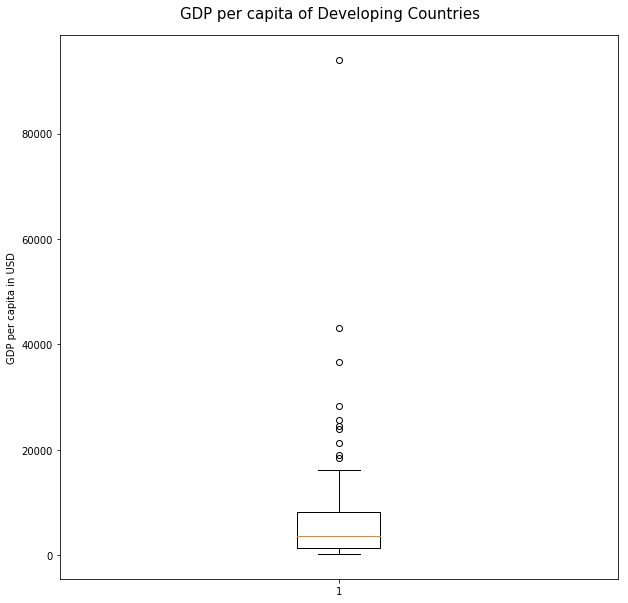

In [20]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(dfDeveloping['GDP per capita'])
plt.ylabel('GDP per capita in USD')
fig.suptitle('GDP per capita of Developing Countries', fontsize=15, y=0.92)

Text(0.5, 0.92, 'CO2 Emissions per capita in tons of Developing Countries')

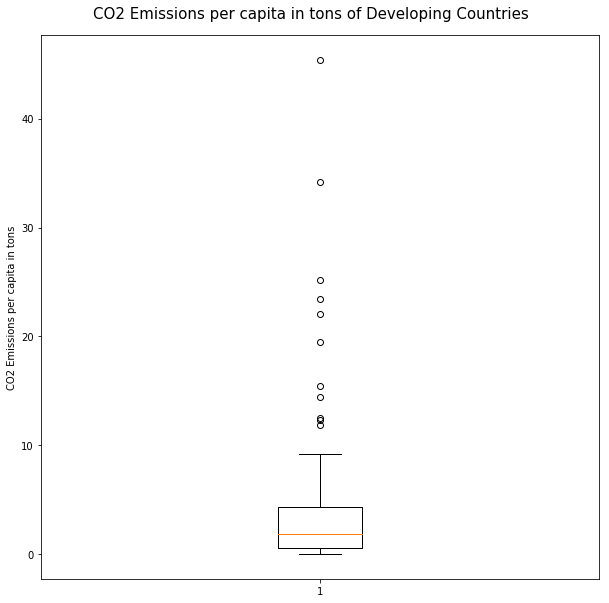

In [21]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(dfDeveloping['CO2 Emissions per capita'])
plt.ylabel('CO2 Emissions per capita in tons')
fig.suptitle('CO2 Emissions per capita in tons of Developing Countries', fontsize=15, y=0.92)

In [22]:
#Mean
dfDeveloping.mean()

GDP per capita              6849.739197
CO2 Emissions per capita       3.695918
dtype: float64

In [23]:
#Median
dfDeveloping.median()

GDP per capita              3747.87
CO2 Emissions per capita       1.80
dtype: float64

In [24]:
#Minimum
dfDeveloping[dfDeveloping['CO2 Emissions per capita'] == np.min(dfDeveloping['CO2 Emissions per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
24,Burundi,336.25,0.0


In [25]:
#Maximum
dfDeveloping[dfDeveloping['CO2 Emissions per capita'] == np.max(dfDeveloping['CO2 Emissions per capita'])]

,Country,GDP per capita,CO2 Emissions per capita
107,Qatar,93965.18,45.4


In [26]:
#Variance
dfDeveloping.var()

GDP per capita              1.007674e+08
CO2 Emissions per capita    3.794807e+01
dtype: float64

In [27]:
#Range
dfDeveloping[['GDP per capita', 'CO2 Emissions per capita']].max() - dfDeveloping[['GDP per capita', 'CO2 Emissions per capita']].min()

GDP per capita              93722.998
CO2 Emissions per capita       45.400
dtype: float64

In [28]:
#Interquartile Range
dfDeveloping.quantile(q=0.75) - dfDeveloping.quantile(q=0.25)

GDP per capita              6787.41
CO2 Emissions per capita       3.75
dtype: float64

In [29]:
#Higher Outlier GDP
np.percentile(dfDeveloping['GDP per capita'], q=75) + (np.percentile(dfDeveloping['GDP per capita'], q=75) - np.percentile(dfDeveloping['GDP per capita'], q=25)) * 1.5

18378.75

In [30]:
dfDeveloping[dfDeveloping['GDP per capita'] >= 18378.75]

,Country,GDP per capita,CO2 Emissions per capita
7,Aruba,25750.80,8.4
9,Bahamas,24034.19,6.3
10,Bahrain,28271.75,23.4
21,Brunei,36606.83,22.1
44,Equatorial Guinea,18389.43,4.7
69,Kuwait,43103.34,25.2
98,Oman,19001.81,15.4
107,Qatar,93965.18,45.4
115,Saudi Arabia,24454.02,19.5
132,Trinidad and Tobago,21310.83,34.2


There are 10 countries that are considered outliers according to their GDP per capita in the developing countries dataset.

In [31]:
#Lower Outlier GDP
np.percentile(dfDeveloping['GDP per capita'], q=25) - (np.percentile(dfDeveloping['GDP per capita'], q=75) - np.percentile(dfDeveloping['GDP per capita'], q=25)) * 1.5

-8770.89

We can disregard the lower outlier because there is no such thing as a negative GDP per capita.

In [32]:
#Higher Outlier CO2 Emissions
np.percentile(dfDeveloping['CO2 Emissions per capita'], q=75) + (np.percentile(dfDeveloping['CO2 Emissions per capita'], q=75) - np.percentile(dfDeveloping['CO2 Emissions per capita'], q=25)) * 1.5

9.925

In [33]:
dfDeveloping[dfDeveloping['CO2 Emissions per capita'] >= 9.925]

,Country,GDP per capita,CO2 Emissions per capita
10,Bahrain,28271.75,23.4
21,Brunei,36606.83,22.1
66,Kazakhstan,12183.51,14.4
69,Kuwait,43103.34,25.2
98,Oman,19001.81,15.4
100,Palau,15209.99,12.3
107,Qatar,93965.18,45.4
109,Russia,12925.96,11.9
115,Saudi Arabia,24454.02,19.5
132,Trinidad and Tobago,21310.83,34.2


There are 11 countries that are considered outliers according to their CO2 Emissions per capita in the developing countries dataset.

### Developed vs. Developing

From the metrics of central tendency, variability, and outliers, we can evaluate some key differences between the two subsets. We see that in general, developed countries have higher GDP per capita and higher CO2 Emissions per capita than developing countries. We can also see that there are many more outliers and higher variance in CO2 Emissions for developing countries. This is contributed to the fact that even though a country can have high GDP and CO2 emissions per capita, it can also have high inequality, where only the few individuals are extremely wealthy. Thus, a country with extremely high GDP per capita can still be a developing country. Developing countries have much more varied economies and living conditions, while developed countries are more stabilized.

To test if there is significant difference between developed and developing countries' CO2 emissions, I conducted a bootstrap hypothesis test. The null hypothesis states that there is no significant difference between the CO2 emissions of developed and developing countries. The alternative hypothesis states that there is a significant difference. I decided to conduct a two-sided test at a significance level of 0.05. 

In [34]:
np.random.seed(42)
a = dfDeveloped['CO2 Emissions per capita']
b = dfDeveloping['CO2 Emissions per capita']
diff = []
for i in range(10000):
    total = np.concatenate((a, b), axis=None)
    np.random.shuffle(total)
    new_a = total[:len(a)]
    new_b = total[len(b):]
    diff.append(np.mean(new_b) - np.mean(new_a))

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Developed and Developing Countries')

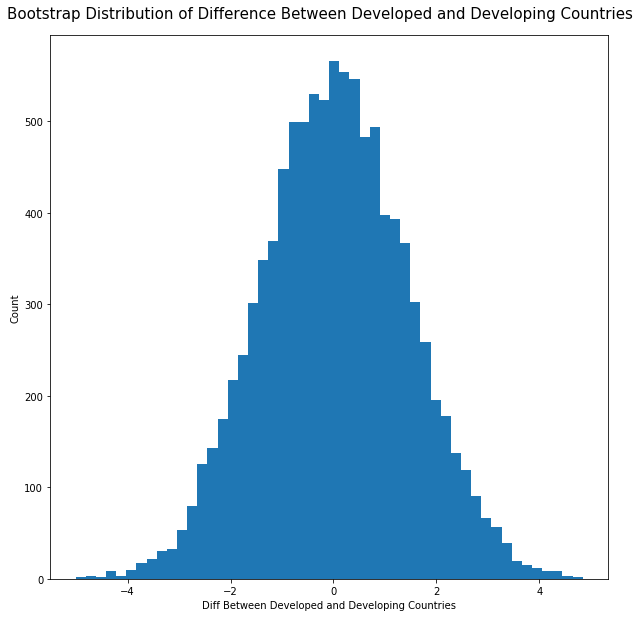

In [35]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between Developed and Developing Countries')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Developed and Developing Countries', fontsize=15, y=0.92)

In [36]:
np.percentile(diff, 97.5)

2.8306249999999995

In [37]:
np.percentile(diff, 2.5)

-2.6806249999999996

In [38]:
np.max(diff)

4.841666666666669

In [39]:
np.min(diff)

-5.011111111111111

My maximum value is much greater than 2.83 and my minimum value is much less than -2.68. I can reject the null hypothesis that there is no significant difference.

## Correlation

### Developed Countries

In [40]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [41]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(dfDeveloped['GDP per capita'], dfDeveloped['CO2 Emissions per capita'])

Text(0.5, 0.92, 'GDP per capita of Developed Countries')

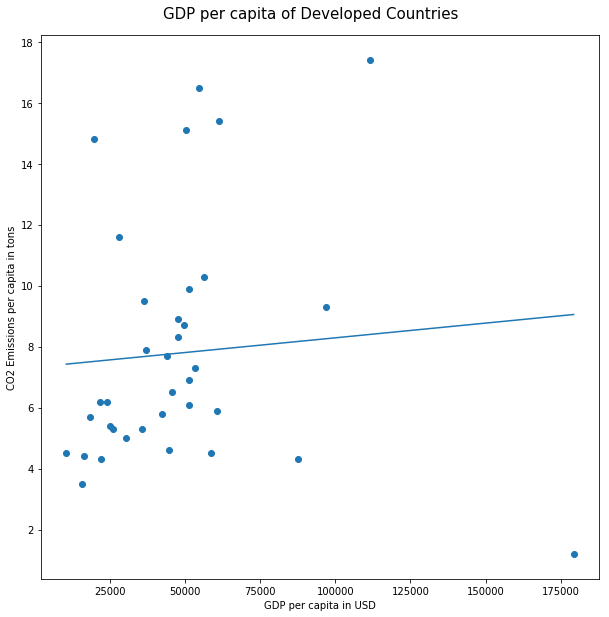

In [42]:
fig = plt.figure(figsize=(10,10))
plt.scatter(dfDeveloped['GDP per capita'], dfDeveloped['CO2 Emissions per capita'])
sorted_order = np.argsort(dfDeveloped['GDP per capita'])
plt.plot(dfDeveloped['GDP per capita'][sorted_order], predictions[sorted_order])
plt.xlabel('GDP per capita in USD')
plt.ylabel('CO2 Emissions per capita in tons')
fig.suptitle('GDP per capita of Developed Countries', fontsize=15, y=0.92)

In [43]:
#Covariance
np.cov(dfDeveloped['GDP per capita'], dfDeveloped['CO2 Emissions per capita'])[0][1]

9684.159523809523

In [44]:
#Correlation
stats.pearsonr(dfDeveloped['GDP per capita'], dfDeveloped['CO2 Emissions per capita'])[0]

0.07784921505289509

The positive covariance tells us that the two variables are positively related. The correlation coefficient, close to 0, indicates a very weak, or no correlation.

### Developing Countries

In [45]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(dfDeveloping['GDP per capita'], dfDeveloping['CO2 Emissions per capita'])

Text(0.5, 0.92, 'GDP per capita of Developing Countries')

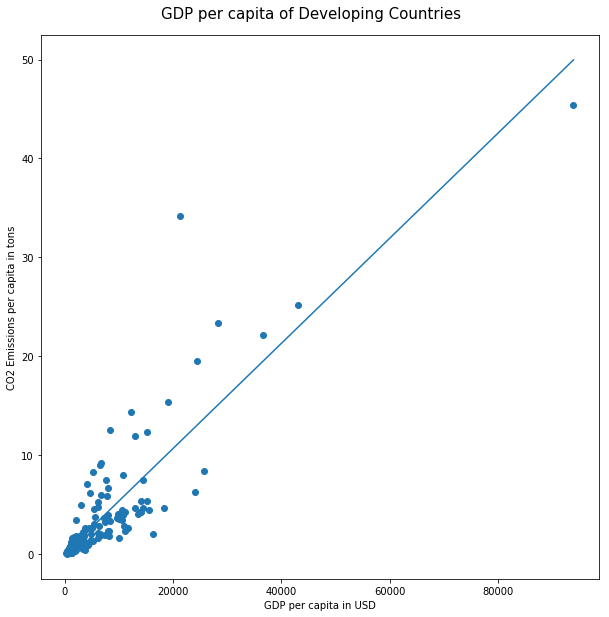

In [46]:
fig = plt.figure(figsize=(10,10))
plt.scatter(dfDeveloping['GDP per capita'], dfDeveloping['CO2 Emissions per capita'])
sorted_order = np.argsort(dfDeveloping['GDP per capita'])
plt.plot(dfDeveloping['GDP per capita'][sorted_order], predictions[sorted_order])
plt.xlabel('GDP per capita in USD')
plt.ylabel('CO2 Emissions per capita in tons')
fig.suptitle('GDP per capita of Developing Countries', fontsize=15, y=0.92)

To get a better sense of the correlation, I transformed the dataset.

Text(0.5, 0.92, 'GDP per capita vs. CO2 Emissions per capita in Developing Countries')

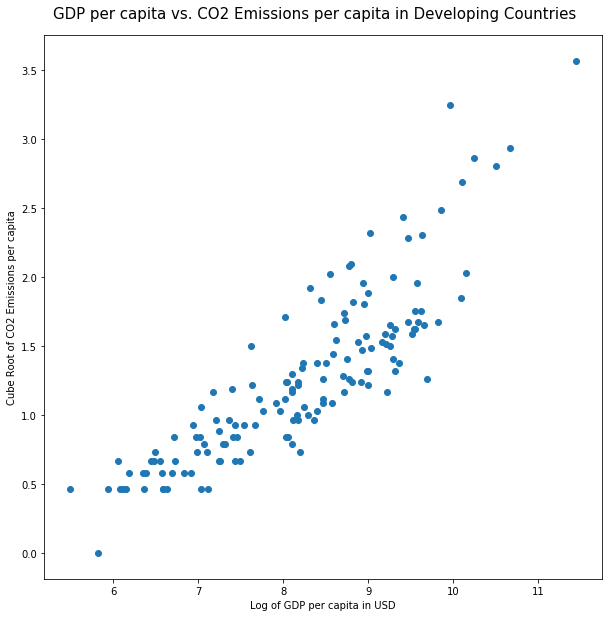

In [47]:
#Transformed
fig = plt.figure(figsize=(10,10))
plt.scatter(np.log(dfDeveloping['GDP per capita']), np.power(dfDeveloping['CO2 Emissions per capita'],1/3))
plt.xlabel('Log of GDP per capita in USD')
plt.ylabel('Cube Root of CO2 Emissions per capita')
fig.suptitle('GDP per capita vs. CO2 Emissions per capita in Developing Countries', fontsize=15, y=0.92)

Here we can see a much more definitive positive correlation.

In [48]:
#Covariance
np.cov(dfDeveloping['GDP per capita'], dfDeveloping['CO2 Emissions per capita'])[0][1]

53520.45126587923

In [49]:
#Correlation
stats.pearsonr(dfDeveloping['GDP per capita'], dfDeveloping['CO2 Emissions per capita'])[0]

0.8654958833163069

The positive covariance tells us that the two variables are positively related. The correlation coefficient, close to 1, indicates a less than perfect, but much stronger correlation.

## Discussion

We can observe that a developed country's CO2 emissions does not tell us anything about the country's economic status. There are countries that may have high GDP and low CO2 emissions, low GDP and high CO2 emissions, and both high GDP and CO2 emissions. This may be contributed by the fact that stabilized countries have the economy and resources to cut down on CO2 emissions and use other sources of energy. However, a good economy can also promote a lavish, wasteful lifestyle, which leads to high fuel consumption from high energy use and extensive traveling.

Though not perfect, developing countries have a stronger correlation between GDP and CO2 emissions per capita. Some of these countries with extremely high GDP rely heavily on the oil exporting industry to generate revenue. Other countries with low GDP and low CO2 emissions simply do not have the industry nor technology to use fossil fuels. This makes it a larger concern for developing countries to have low CO2 emissions.  